# Create Datasets

We have written several pre-made datasets based on [PyG's dataset specifications](https://pytorch-geometric.readthedocs.io/en/latest/tutorial/create_dataset.html) and provide easy ways to help you build the subsets of data you need!

In [1]:
import seaborn as sns
import torch
from matplotlib import pyplot as plt
from rdkit import Chem
from torch_geometric.data import Data

from qm9star_query.dataset.base_dataset import BaseQM9starDataset
from qm9star_query.dataset.sub_datasets import (
    AnionQM9starDataset,
    CationQM9starDataset,
    NeutralQM9starDataset,
    RadicalQM9starDataset,
)

pt = Chem.GetPeriodicTable()

# energy from /tutorial/atom_ref
atom_single_point_energy = {
    "H": -0.5021559,
    "C": -37.7375894,
    "N": -54.4992609,
    "O": -74.9889063,
    "F": -99.7605802,
}


def get_total_atom_energy(atom_list: list[int]):
    res = 0
    for atom in atom_list:
        res += atom_single_point_energy[Chem.Atom(atom).GetSymbol()]
    return res


def transform_data(raw_data):
    return Data(
        pos=torch.tensor(raw_data["coords"], dtype=torch.float32),
        z=torch.tensor(raw_data["atoms"], dtype=torch.int64),
        energy=torch.tensor(
            raw_data["single_point_energy"], dtype=torch.float32),
        atomic_formation_energy=torch.tensor(
            raw_data["single_point_energy"] -
            get_total_atom_energy(raw_data["atoms"]),
            dtype=torch.float32,
        ),
        y=torch.tensor(raw_data["single_point_energy"], dtype=torch.float32),
        energy_grad=-torch.tensor(raw_data["forces"], dtype=torch.float32),
        formal_charges=torch.tensor(
            raw_data["formal_charges"], dtype=torch.int64),
        formal_num_radicals=torch.tensor(
            raw_data["formal_num_radicals"], dtype=torch.int64
        ),
        bonds=torch.tensor(raw_data["bonds"], dtype=torch.int64),
        mulliken_charge=torch.tensor(
            raw_data["mulliken_charge"], dtype=torch.float32),
        spin_densities=torch.tensor(
            raw_data["spin_densities"], dtype=torch.float32),
        zpve=torch.tensor(raw_data["zpve"], dtype=torch.float32),
        energy_correction=torch.tensor(
            raw_data["energy_correction"], dtype=torch.float32
        ),
        enthalpy_correction=torch.tensor(
            raw_data["enthalpy_correction"], dtype=torch.float32
        ),
        gibbs_free_energy_correction=torch.tensor(
            raw_data["gibbs_free_energy_correction"], dtype=torch.float32
        ),
        U_0=torch.tensor(raw_data["U_0"], dtype=torch.float32),
        U_T=torch.tensor(raw_data["U_T"], dtype=torch.float32),
        H_T=torch.tensor(raw_data["H_T"], dtype=torch.float32),
        G_T=torch.tensor(raw_data["G_T"], dtype=torch.float32),
        S=torch.tensor(raw_data["S"], dtype=torch.float32),
        Cv=torch.tensor(raw_data["Cv"], dtype=torch.float32),
        rotation_consts=torch.tensor(
            raw_data["rotation_consts"], dtype=torch.float32),
        isotropic_polarizability=torch.tensor(
            raw_data["isotropic_polarizability"], dtype=torch.float32
        ),
        electronic_spatial_extent=torch.tensor(
            raw_data["electronic_spatial_extent"], dtype=torch.float32
        ),
        alpha_homo=torch.tensor(raw_data["alpha_homo"], dtype=torch.float32),
        alpha_lumo=torch.tensor(raw_data["alpha_lumo"], dtype=torch.float32),
        alpha_gap=torch.tensor(raw_data["alpha_gap"], dtype=torch.float32),
        dipole=torch.tensor(raw_data["dipole"], dtype=torch.float32),
        quadrupole=torch.tensor(raw_data["quadrupole"], dtype=torch.float32),
        octapole=torch.tensor(raw_data["octapole"], dtype=torch.float32),
        hexadecapole=torch.tensor(
            raw_data["hexadecapole"], dtype=torch.float32),
        nbo_charges=torch.tensor(raw_data["nbo_charges"], dtype=torch.float32),
    )


def transform_data_radical(raw_data):
    return Data(
        pos=torch.tensor(raw_data["coords"], dtype=torch.float32),
        z=torch.tensor(raw_data["atoms"], dtype=torch.int64),
        energy=torch.tensor(
            raw_data["single_point_energy"], dtype=torch.float32),
        atomic_formation_energy=torch.tensor(
            raw_data["single_point_energy"] -
            get_total_atom_energy(raw_data["atoms"]),
            dtype=torch.float32,
        ),
        y=torch.tensor(raw_data["single_point_energy"], dtype=torch.float32),
        energy_grad=-torch.tensor(raw_data["forces"], dtype=torch.float32),
        formal_charges=torch.tensor(
            raw_data["formal_charges"], dtype=torch.int64),
        formal_num_radicals=torch.tensor(
            raw_data["formal_num_radicals"], dtype=torch.int64
        ),
        bonds=torch.tensor(raw_data["bonds"], dtype=torch.int64),
        mulliken_charge=torch.tensor(
            raw_data["mulliken_charge"], dtype=torch.float32),
        spin_densities=torch.tensor(
            raw_data["spin_densities"], dtype=torch.float32),
        zpve=torch.tensor(raw_data["zpve"], dtype=torch.float32),
        energy_correction=torch.tensor(
            raw_data["energy_correction"], dtype=torch.float32
        ),
        enthalpy_correction=torch.tensor(
            raw_data["enthalpy_correction"], dtype=torch.float32
        ),
        gibbs_free_energy_correction=torch.tensor(
            raw_data["gibbs_free_energy_correction"], dtype=torch.float32
        ),
        U_0=torch.tensor(raw_data["U_0"], dtype=torch.float32),
        U_T=torch.tensor(raw_data["U_T"], dtype=torch.float32),
        H_T=torch.tensor(raw_data["H_T"], dtype=torch.float32),
        G_T=torch.tensor(raw_data["G_T"], dtype=torch.float32),
        S=torch.tensor(raw_data["S"], dtype=torch.float32),
        Cv=torch.tensor(raw_data["Cv"], dtype=torch.float32),
        rotation_consts=torch.tensor(
            raw_data["rotation_consts"], dtype=torch.float32),
        isotropic_polarizability=torch.tensor(
            raw_data["isotropic_polarizability"], dtype=torch.float32
        ),
        electronic_spatial_extent=torch.tensor(
            raw_data["electronic_spatial_extent"], dtype=torch.float32
        ),
        alpha_homo=torch.tensor(raw_data["alpha_homo"], dtype=torch.float32),
        alpha_lumo=torch.tensor(raw_data["alpha_lumo"], dtype=torch.float32),
        alpha_gap=torch.tensor(raw_data["alpha_gap"], dtype=torch.float32),
        dipole=torch.tensor(raw_data["dipole"], dtype=torch.float32),
        quadrupole=torch.tensor(raw_data["quadrupole"], dtype=torch.float32),
        octapole=torch.tensor(raw_data["octapole"], dtype=torch.float32),
        hexadecapole=torch.tensor(
            raw_data["hexadecapole"], dtype=torch.float32),
        nbo_charges=torch.tensor(raw_data["nbo_charges"], dtype=torch.float32),
        spin_quantum_number=torch.tensor(
            raw_data["spin_quantum_number"], dtype=torch.float32
        ),
        spin_square=torch.tensor(raw_data["spin_square"], dtype=torch.float32),
    )

As with several of the dataset classes imported above, the `BaseQM9starDataset` class is a base class that is not recommended to be used directly. Instead, you should use one of the subclasses that are defined in the `qm9star_query.dataset.sub_datasets` module, or create your own subclass of `BaseQM9starDataset`.

If you are using these dataset classes for the first time, you must specify the PostgreSQL database instance to which you need to connect in the initialisation. How to deploy it is described in the [download_and_deploy_qm9star](1-download_and_deploy_qm9star.md).

After executing the following code, a subset of the specified range will be downloaded from the QM9star database and cached in npz format. The dataset will then execute the `process` method to transform each piece of data into a tensor based on the `transform` function passed in.You can replace the `transform` function as per your requirement.

In order to extract a customised subset, you need to inherit the `BaseQM9starDataset` class and override the `db_select` method, which allows you to define a database query, and then only the data that satisfies the query will be downloaded. We use SQLModel as our database engine. For more information on how to customise the meticulous query statements, you can visit [SQLModel's documentation](https://sqlmodel.tiangolo.com/) ( owesome tutorial on getting started with databases), or refer to our implementation from this project.

In [2]:
neutral_dataset = NeutralQM9starDataset(
    user="hxchem",
    password="hxchem",
    server="127.0.0.1",  # actual server address
    port=35432,  # actual port
    db="qm9star",
    dataset_name="qm9star_neutral",
    block_num=5,
    log=True,
    transform=transform_data,
)

./raw/qm9star_neutral_chunk00.npz saved


./raw/qm9star_neutral_chunk01.npz saved


./raw/qm9star_neutral_chunk02.npz saved


./raw/qm9star_neutral_chunk03.npz saved


./raw/qm9star_neutral_chunk04.npz saved
processing ./processed/qm9star_neutral_chunk00_processed.pt


Processing...


./processed/qm9star_neutral_chunk00_processed.pt saved
processing ./processed/qm9star_neutral_chunk01_processed.pt
./processed/qm9star_neutral_chunk01_processed.pt saved
processing ./processed/qm9star_neutral_chunk02_processed.pt
./processed/qm9star_neutral_chunk02_processed.pt saved
processing ./processed/qm9star_neutral_chunk03_processed.pt
./processed/qm9star_neutral_chunk03_processed.pt saved
processing ./processed/qm9star_neutral_chunk04_processed.pt
./processed/qm9star_neutral_chunk04_processed.pt saved


Done!


In [3]:
cation_dataset = CationQM9starDataset(
    user="hxchem",
    password="hxchem",
    server="127.0.0.1",
    port=35432,
    db="qm9star",
    dataset_name="qm9star_cation",
    block_num=5,
    log=True,
    transform=transform_data,
)

./raw/qm9star_cation_chunk00.npz saved


./raw/qm9star_cation_chunk01.npz saved


./raw/qm9star_cation_chunk02.npz saved


./raw/qm9star_cation_chunk03.npz saved


./raw/qm9star_cation_chunk04.npz saved
processing ./processed/qm9star_cation_chunk00_processed.pt


Processing...


./processed/qm9star_cation_chunk00_processed.pt saved
processing ./processed/qm9star_cation_chunk01_processed.pt
./processed/qm9star_cation_chunk01_processed.pt saved
processing ./processed/qm9star_cation_chunk02_processed.pt
./processed/qm9star_cation_chunk02_processed.pt saved
processing ./processed/qm9star_cation_chunk03_processed.pt
./processed/qm9star_cation_chunk03_processed.pt saved
processing ./processed/qm9star_cation_chunk04_processed.pt
./processed/qm9star_cation_chunk04_processed.pt saved


Done!


In [4]:
anion_dataset = AnionQM9starDataset(
    user="hxchem",
    password="hxchem",
    server="127.0.0.1",
    port=35432,
    db="qm9star",
    dataset_name="qm9star_anion",
    block_num=5,
    log=True,
    transform=transform_data,
)

./raw/qm9star_anion_chunk00.npz saved


./raw/qm9star_anion_chunk01.npz saved


./raw/qm9star_anion_chunk02.npz saved


./raw/qm9star_anion_chunk03.npz saved


./raw/qm9star_anion_chunk04.npz saved
processing ./processed/qm9star_anion_chunk00_processed.pt


Processing...


./processed/qm9star_anion_chunk00_processed.pt saved
processing ./processed/qm9star_anion_chunk01_processed.pt
./processed/qm9star_anion_chunk01_processed.pt saved
processing ./processed/qm9star_anion_chunk02_processed.pt
./processed/qm9star_anion_chunk02_processed.pt saved
processing ./processed/qm9star_anion_chunk03_processed.pt
./processed/qm9star_anion_chunk03_processed.pt saved
processing ./processed/qm9star_anion_chunk04_processed.pt
./processed/qm9star_anion_chunk04_processed.pt saved


Done!


In [5]:
radical_dataset = RadicalQM9starDataset(
    user="hxchem",
    password="hxchem",
    server="127.0.0.1",
    port=35432,
    db="qm9star",
    dataset_name="qm9star_radical",
    block_num=5,
    log=True,
    transform=transform_data_radical,
)

./raw/qm9star_radical_chunk00.npz saved


./raw/qm9star_radical_chunk01.npz saved


./raw/qm9star_radical_chunk02.npz saved


./raw/qm9star_radical_chunk03.npz saved


./raw/qm9star_radical_chunk04.npz saved
processing ./processed/qm9star_radical_chunk00_processed.pt


Processing...


./processed/qm9star_radical_chunk00_processed.pt saved
processing ./processed/qm9star_radical_chunk01_processed.pt
./processed/qm9star_radical_chunk01_processed.pt saved
processing ./processed/qm9star_radical_chunk02_processed.pt
./processed/qm9star_radical_chunk02_processed.pt saved
processing ./processed/qm9star_radical_chunk03_processed.pt
./processed/qm9star_radical_chunk03_processed.pt saved
processing ./processed/qm9star_radical_chunk04_processed.pt
./processed/qm9star_radical_chunk04_processed.pt saved


Done!


If your transform function defines `pos`, `z`, `bonds`, `formal_charges` and `formal_num_radicals` as our implementation, you can use the `get_rdmol` method to get the RDKit molecule. Here is an example:

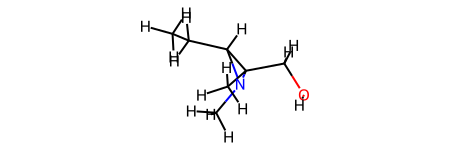

In [6]:
neutral_dataset.get_rdmol(100000)

## Dataset Distribution

###  Distribution of global features

**Global features** are the features of a molecule as a whole.

In [7]:
import pandas as pd

global_features_neutral_df = pd.DataFrame(
    {
        "energy(Hartree)": neutral_dataset.energy,
        "atomic_formation_energy(Hartree)": neutral_dataset.atomic_formation_energy,
        "gap(Hartree)": neutral_dataset.alpha_gap,
        "zpve(Hartree)": neutral_dataset.zpve,
        "enthalpy(Hartree)": neutral_dataset.H_T,
        "entropy(cal/mol/K)": neutral_dataset.S,
        "free_energy(Hartree)": neutral_dataset.G_T,
        "isotropic_polarizability(bohr^3)": neutral_dataset.isotropic_polarizability,
        "electronic_spatial_extent(bohr^2)": neutral_dataset.electronic_spatial_extent,
    }
)
global_features_neutral_df["class"] = "neutral"
global_features_cation_df = pd.DataFrame(
    {
        "energy(Hartree)": cation_dataset.energy,
        "atomic_formation_energy(Hartree)": cation_dataset.atomic_formation_energy,
        "gap(Hartree)": cation_dataset.alpha_gap,
        "zpve(Hartree)": cation_dataset.zpve,
        "enthalpy(Hartree)": cation_dataset.H_T,
        "entropy(cal/mol/K)": cation_dataset.S,
        "free_energy(Hartree)": cation_dataset.G_T,
        "isotropic_polarizability(bohr^3)": cation_dataset.isotropic_polarizability,
        "electronic_spatial_extent(bohr^2)": cation_dataset.electronic_spatial_extent,
    }
)
global_features_cation_df["class"] = "cation"
global_features_anion_df = pd.DataFrame(
    {
        "energy(Hartree)": anion_dataset.energy,
        "atomic_formation_energy(Hartree)": anion_dataset.atomic_formation_energy,
        "gap(Hartree)": anion_dataset.alpha_gap,
        "zpve(Hartree)": anion_dataset.zpve,
        "enthalpy(Hartree)": anion_dataset.H_T,
        "entropy(cal/mol/K)": anion_dataset.S,
        "free_energy(Hartree)": anion_dataset.G_T,
        "isotropic_polarizability(bohr^3)": anion_dataset.isotropic_polarizability,
        "electronic_spatial_extent(bohr^2)": anion_dataset.electronic_spatial_extent,
    }
)
global_features_anion_df["class"] = "anion"
global_features_radical_df = pd.DataFrame(
    {
        "energy(Hartree)": radical_dataset.energy,
        "atomic_formation_energy(Hartree)": radical_dataset.atomic_formation_energy,
        "gap(Hartree)": radical_dataset.alpha_gap,
        "zpve(Hartree)": radical_dataset.zpve,
        "enthalpy(Hartree)": radical_dataset.H_T,
        "entropy(cal/mol/K)": radical_dataset.S,
        "free_energy(Hartree)": radical_dataset.G_T,
        "isotropic_polarizability(bohr^3)": radical_dataset.isotropic_polarizability,
        "electronic_spatial_extent(bohr^2)": radical_dataset.electronic_spatial_extent,
        "spin_quantum_number": radical_dataset.spin_quantum_number,
        "spin_square": radical_dataset.spin_square,
    }
)
global_features_radical_df["class"] = "radical"

In [8]:
global_features_total_df = (
    pd.concat(
        [
            global_features_neutral_df,
            global_features_cation_df,
            global_features_anion_df,
            global_features_radical_df,
        ]
    )
    .reset_index(drop=True)
    .fillna(0)
)


def draw_global_feature_distribution(df: pd.DataFrame, feature_name: str):
    def annotate(data, **kws):
        ax = plt.gca()
        ax.text(
            0.7,
            0.9,
            f"$\mu$ = {data[feature_name].mean():>8.3f}",
            transform=ax.transAxes,
        )
        ax.text(
            0.7,
            0.8,
            f"$\sigma$ = {data[feature_name].std():>8.3f}",
            transform=ax.transAxes,
        )

    g = sns.FacetGrid(df, col="class", hue="class", col_wrap=2)
    g = g.map(sns.histplot, feature_name)
    g = g.map_dataframe(annotate)
    g.figure.set_size_inches(6, 3.5)
    return g

### The total Single Point Energy

The single point energy is strongly correlated with the number of atoms in the molecule, and there are many molecules with different atomic compositions in the dataset, and the distribution of energies of the isomers approximates a normal distribution. The distribution is therefore shown as a superposition of several small normal distributions.

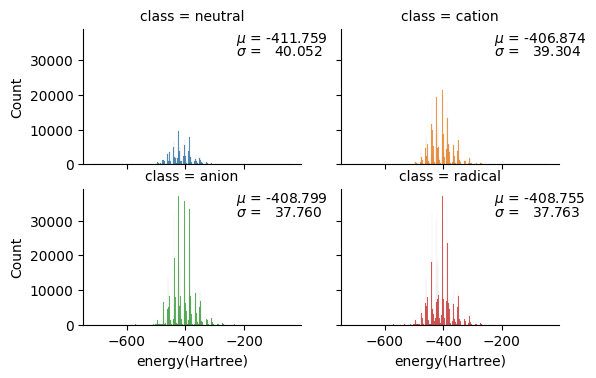

In [9]:
draw_global_feature_distribution(global_features_total_df, "energy(Hartree)")

We define `atomic_formation_energy` as the single point energy of a molecule minus the sum of the single point energies of all its atoms. This energy distribution can be found to be very close to a normal distribution.

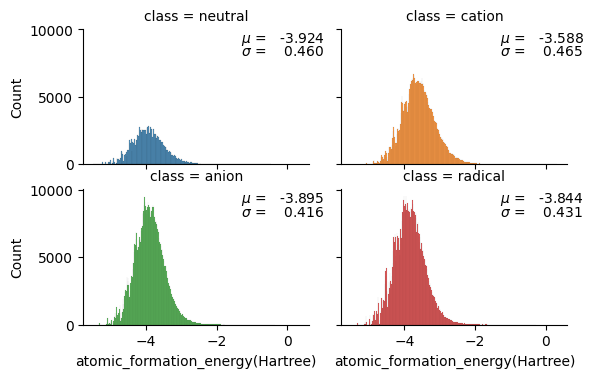

In [10]:
draw_global_feature_distribution(
    global_features_total_df, "atomic_formation_energy(Hartree)"
)

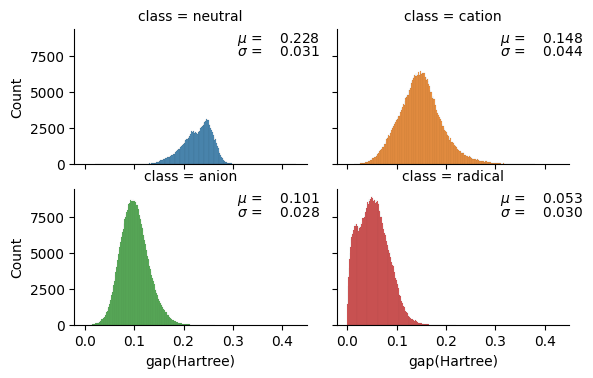

In [11]:
draw_global_feature_distribution(global_features_total_df, "gap(Hartree)")

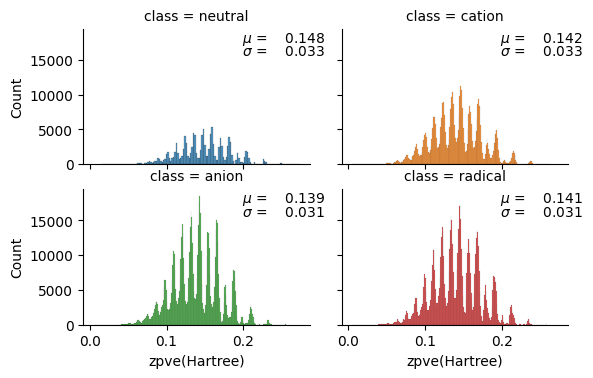

In [12]:
draw_global_feature_distribution(global_features_total_df, "zpve(Hartree)")

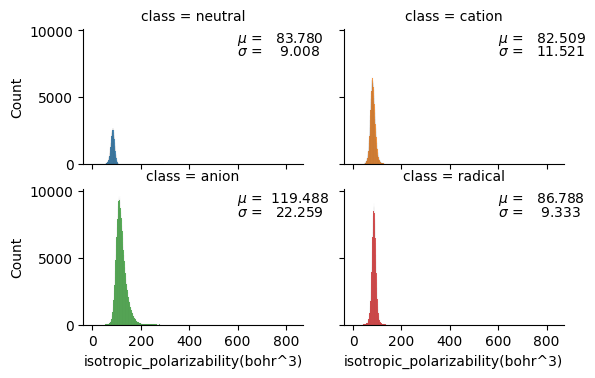

In [13]:
draw_global_feature_distribution(
    global_features_total_df, "isotropic_polarizability(bohr^3)"
)

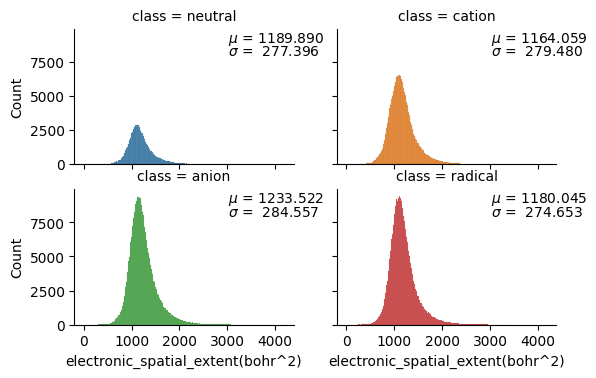

In [14]:
draw_global_feature_distribution(
    global_features_total_df, "electronic_spatial_extent(bohr^2)"
)

### Distribution of local features

**Local features** are the features that can be assigned locally to a molecule. In the QM9star dataset, are atomic level features.

In [20]:
local_features_neutral_df = pd.DataFrame(
    {
        "element": map(lambda x: pt.GetElementSymbol(int(x)), neutral_dataset.z),
        "mudule_of_force(hartree/bohr)": neutral_dataset.energy_grad.norm(dim=-1),
        "mulliken_charge": neutral_dataset.mulliken_charge,
        "nbo_charges": neutral_dataset.nbo_charges,
    }
)
local_features_neutral_df["class"] = "neutral"

In [21]:
local_features_neutral_df

,element,mudule_of_force(hartree/bohr),mulliken_charge,nbo_charges,class
0,O,0.000008,-0.298427,-0.53398,neutral
1,C,0.000033,0.195735,0.65934,neutral
2,O,0.000041,-0.056426,-0.55139,neutral
3,C,0.000048,-0.285802,-0.03022,neutral
4,C,0.000038,-0.270484,-0.48845,neutral
...,...,...,...,...,...
2164259,H,0.000003,0.150151,0.19636,neutral
2164260,H,0.000004,0.144339,0.20638,neutral
2164261,H,0.000005,0.155547,0.19550,neutral
2164262,H,0.000007,0.148666,0.19235,neutral
